#Project 1: Multi-layer Perceptron (MLP)
*Siyi Xian*

*Prof. Haixu Tang*

*CSCI-B 455*

*Feb. 18, 2019*

## Wine Data Set.
Fist of all, I import data set using numpy. According to description, the fisrt column of data is target and the rest thirteen columns are inputs. To avoid the effcet of different range of value, I decided to scale them first. Becasue all value are possitive number, we can directly scale them in range $[0,1]$. 

In [0]:
import numpy as np

# import and load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data = np.loadtxt(url, delimiter=",")

# divide data into X and y
X = data[:, 1:14]
y = data[:, 0].astype(int)
# scale all X
for i in range(13):
  X[:, i] = X[:, i] / max(X[:, i])

## Initialization
Initialize MLP Classifier first. Becasue our data set only have $178$ data point, we need to use $solver = 'lbfgs'$ for small data set. The out put is in ${1, 2, 3}$, we have to use $logistic$ as our activation function. Then we have $13$ inputs, we choose $52$ as the size of our hiden layers, which is $4$ times of inputs. To make our traning process as accurate as we can, I put learning rate as $1\times10^{-5}$ and max iteration as $1\times10^4$.

In [0]:
from sklearn.neural_network import MLPClassifier

# initializate classifier 
mlp = MLPClassifier(solver = 'lbfgs', 
                    activation = 'logistic', 
                    hidden_layer_sizes = (52), 
                    learning_rate_init = 1e-5, 
                    max_iter = 1e+4,
                    verbose = True)

##Evaluation
Using $cross\_validate$ as k-fold cross validation. Then predict result for our classifier.

In [0]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(mlp, X, y, cv=5, scoring='accuracy')
print(scores['test_score'])
print(scores['test_score'].mean())

[0.94594595 1.         0.94444444 1.         0.94117647]
0.9663133721957251


Create baseline prediction and get accuracy.

In [0]:
from sklearn.metrics import accuracy_score

baseline = [random.randint(1,3)] * y.shape[0]
baseline_score = accuracy_score(y, baseline)
print(baseline_score)

0.2696629213483146


Plot two different model. Accodring to result, our MLP model has an accuracy above $95\%$ which as comparison, baseline model is around $30\%$ .

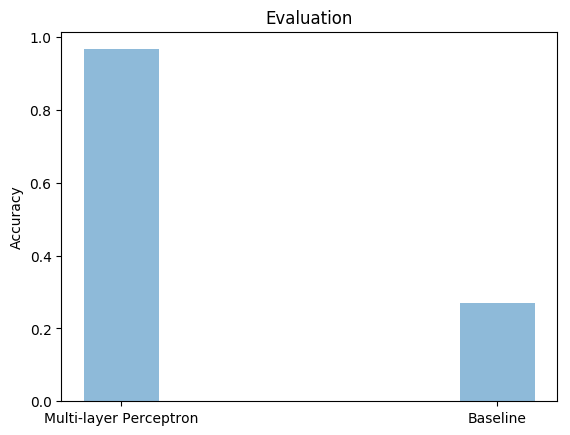

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
 
objects = ('Multi-layer Perceptron', 'Baseline')
y_pos = np.arange(len(objects))
performance = [scores['test_score'].mean(), baseline_score]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, width = 0.2)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Evaluation')
 
plt.show()

### Outout example
An example of how to use our MLP model and some value of parameters.


In [0]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# divide four fifths as train data and rest as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

# train data
mlp.fit(X_train, y_train) 
# predict using test data
pred = mlp.predict(X_test)
# print out result
print ("Predict outputs:\n", pred)
print ("Expected outputs:\n", y_test)
print ("Accuracy:", mlp.score(X_test, y_test))
print ("Loss:", mlp.loss_)
print ("Outputs range size:", mlp.n_outputs_)
print ("Activation function:", mlp.out_activation_)

print("\nConfusion matrix:\n", confusion_matrix(y_test,mlp.predict(X_test)))
print("Classification report:\n", classification_report(y_test,mlp.predict(X_test)))

Predict outputs:
 [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]
Expected outputs:
 [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]
Accuracy: 1.0
Loss: 0.0016401641561017556
Outputs range size: 3
Activation function: softmax

Confusion matrix:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

